#### Nama: Sabina Nurlatifah Aurelia
#### NIM : 2209106002
#### Kelas : Informatika A1 2022

#### POSTTEST 6

Link data set: https://www.kaggle.com/datasets/sujaykapadnis/tornados/data

import library yang digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

import database dan tampilkan 5 data teratas

In [2]:
aurel = pd.read_csv('tornados.csv')
aurel.head()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0,2.0,37,1,1,101,0,0,0,False


menampilkan informasi data

In [3]:
aurel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

cek apakah ada nilai null

In [4]:
aurel.isna().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

mengganti nilai mag menggunakan modus

In [5]:
modus = aurel['mag'].mode()[0]
aurel['mag'].fillna(modus, inplace= True)
aurel.isna().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag                 0
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

mengganti nilai loss menggunakan modus

In [6]:
modus = aurel['loss'].mode()[0]
aurel['loss'].fillna(modus, inplace= True)
aurel.isna().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

mengecek nilai duplikat

In [7]:
aurel.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68688    False
68689    False
68690    False
68691    False
68692    False
Length: 68693, dtype: bool

##### Normalisasi Data

In [9]:
min_max_scaler = MinMaxScaler()
aurel[['len','wid']] = min_max_scaler.fit_transform(aurel[['len','wid']])

mengubah data kategorikal menjadi numerikal

In [10]:
label_encoder = LabelEncoder()

mengencode kolom dengan tipe data 'object' menjadi bilangan bulat (integer) menggunakan LabelEncoder. 

In [11]:
for column in aurel.columns:
    if aurel[column].dtype == 'object':
        aurel[column] = label_encoder.fit_transform(aurel[column])

In [12]:
aurel.head()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,86,1258,0,175,36,40,...,-102.3,0.067320,0.002185,1,1,25,0,0,0,False
1,193,1950,10,9,87,135,0,176,27,37,...,0.0,0.008522,0.192308,1,1,47,0,0,0,False
2,195,1950,11,20,89,140,0,178,17,21,...,0.0,0.000426,0.002185,1,1,177,0,0,0,False
3,196,1950,11,20,89,240,0,179,17,21,...,0.0,0.000426,0.002185,1,1,209,0,0,0,False
4,197,1950,11,20,89,449,0,180,25,28,...,0.0,0.008522,0.008086,1,1,101,0,0,0,False


menghapus kolom fc (bool)

In [13]:
aurel = aurel.drop(['fc'], axis =1)

In [15]:
aurel.head(10)

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elat,elon,len,wid,ns,sn,f1,f2,f3,f4
0,192,1950,10,1,86,1258,0,175,36,40,...,36.88,-102.30,0.067320,0.002185,1,1,25,0,0,0
1,193,1950,10,9,87,135,0,176,27,37,...,0.00,0.00,0.008522,0.192308,1,1,47,0,0,0
2,195,1950,11,20,89,140,0,178,17,21,...,0.00,0.00,0.000426,0.002185,1,1,177,0,0,0
3,196,1950,11,20,89,240,0,179,17,21,...,0.00,0.00,0.000426,0.002185,1,1,209,0,0,0
4,197,1950,11,20,89,449,0,180,25,28,...,0.00,0.00,0.008522,0.008086,1,1,101,0,0,0
5,194,1950,11,4,88,1018,0,177,38,42,...,40.40,-75.93,0.067746,0.021853,1,1,71,11,0,0
6,198,1950,12,2,90,898,0,181,14,17,...,39.07,-89.72,0.080102,0.010927,1,1,119,117,0,0
7,199,1950,12,2,90,958,0,182,14,17,...,38.90,-89.38,0.076694,0.043706,1,1,119,5,0,0
8,200,1950,12,2,90,983,0,183,2,5,...,36.18,-91.72,0.033234,0.002185,1,1,65,0,0,0
9,201,1950,12,2,90,1048,0,184,14,17,...,38.22,-89.62,0.040903,0.010927,1,1,157,0,0,0


##### Data Split Test

In [85]:
X = aurel.drop ('tz', axis =1) #feature
y = aurel['tz'] #target

membagi data dengan proporsi training set dan test set 70:30

In [86]:
X_train, x_test, y_train, y_test = train_test_split (X, y, test_size =0.3)

mencetak panjang masing- masing set data

In [87]:
print (f' panjang x train : {len(X_train)}\n')
print (f' panjang x test : {len(x_test)}\n')
print (f' panjang y train : {len(y_train)}\n')
print (f' panjang y test : {len(y_test)}\n')

 panjang x train : 48085

 panjang x test : 20608

 panjang y train : 48085

 panjang y test : 20608



##### Sequential Model

In [88]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(32, activation= 'relu', input_shape=(X_train.shape[1],)),
     tf.keras.layers.Dense(16,  activation= 'relu'),
     tf.keras.layers.Dense(1, activation= 'sigmoid')
])

fungsi Callback

In [90]:
monitor_callbacks =EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5) #mengentikan 5 epoch berikutnya

model compile

In [91]:
model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

informasi tentang setiap lapisan dalam model

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                832       
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1377 (5.38 KB)
Trainable params: 1377 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Fitting model

In [94]:
fit = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    verbose = 1,
    callbacks = [monitor_callbacks]
)

Epoch 1/100
1503/1503 [==============================] - 2s 1ms/step - loss: 0.6351 - accuracy: 0.9993 - val_loss: 0.1821 - val_accuracy: 0.9995
Epoch 2/100
1503/1503 [==============================] - 2s 1ms/step - loss: 0.5707 - accuracy: 0.9991 - val_loss: 2.0695 - val_accuracy: 0.9995
Epoch 3/100
1503/1503 [==============================] - 2s 1ms/step - loss: 0.6718 - accuracy: 0.9993 - val_loss: 0.3816 - val_accuracy: 0.9995
Epoch 4/100
1503/1503 [==============================] - 2s 1ms/step - loss: 0.3540 - accuracy: 0.9991 - val_loss: 1.1871 - val_accuracy: 0.9995
Epoch 5/100
1503/1503 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.9994 - val_loss: 0.1643 - val_accuracy: 0.9986
Epoch 6/100
1503/1503 [==============================] - 2s 1ms/step - loss: 0.4277 - accuracy: 0.9991 - val_loss: 0.2980 - val_accuracy: 0.9994


##### Evaluasi Model

In [95]:
model.evaluate(x_test, y_test)

644/644 [==============================] - 0s 703us/step - loss: 0.2980 - accuracy: 0.9994


[0.2980467975139618, 0.9994177222251892]

model ini memiliki kinerja yang baik dalam mengklasifikasi atau memprediksi. tingkat akurasi yang tinggi (0.999) dan loss yang cukup tinggi yaitu(4.000) 
menunjukkan bahwa model memprediksi tidak seakurat yang diharapkan

In [96]:
print(classification_report(y_test, model.predict(x_test).round(), target_names = ['America/Chicago', 'America/Denver']))

644/644 [==============================] - 0s 633us/step
                 precision    recall  f1-score   support

America/Chicago       1.00      1.00      1.00     20597
 America/Denver       0.00      0.00      0.00        11

       accuracy                           1.00     20608
      macro avg       0.50      0.50      0.50     20608
   weighted avg       1.00      1.00      1.00     20608



model sangat baik dalam memprediksi 'America/Chicago', tetapi sangat buruk dalam memprediksi 'America/Denver'.

##### Akurasi

In [97]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)

y_pred_binary = (y_pred > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

644/644 [==============================] - 0s 628us/step
Accuracy: 0.999417701863354


Grafik metrik (akurasi/loss) dan loss terhadap epochs pada training dan validation

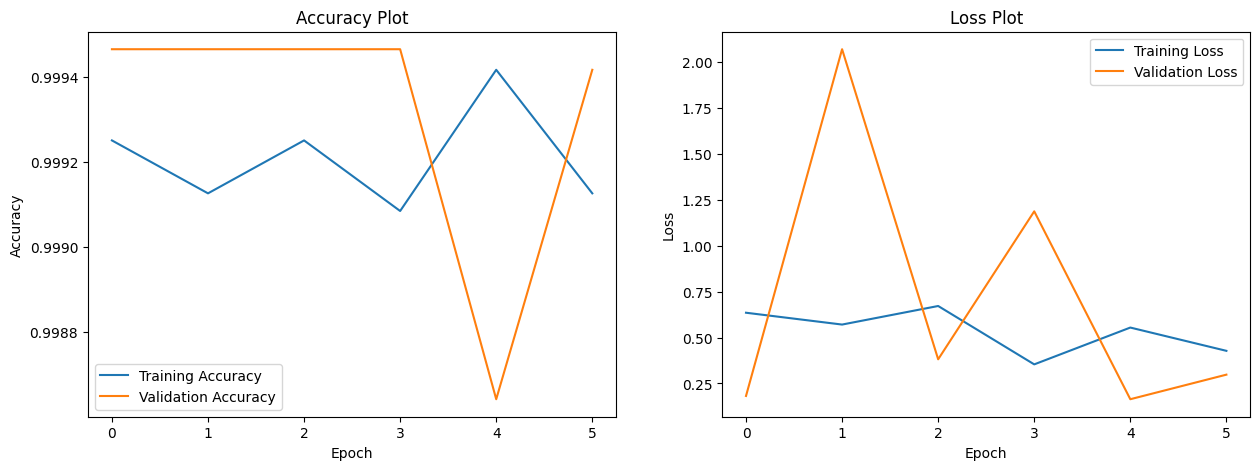

In [98]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()